Stock price prediction using multivariate data(Open, High, Low, Close, Volume)

In [122]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
import pandas_datareader as reader
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

In [123]:
df = reader.DataReader('GOOGL', 'yahoo', '2021-01-01', '2022-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,1757.500000,1736.089966,1737.270020,1752.640015,1053500,1752.640015
2021-01-04,1762.489990,1707.140015,1760.000000,1726.130005,1866200,1726.130005
2021-01-05,1746.829956,1716.900024,1725.089966,1740.050049,1018000,1740.050049
2021-01-06,1743.969971,1696.099976,1700.260010,1722.880005,2329400,1722.880005
2021-01-07,1777.819946,1726.760010,1726.760010,1774.339966,2096800,1774.339966
...,...,...,...,...,...,...
2021-12-27,2966.879883,2943.389893,2945.120117,2958.129883,798800,2958.129883
2021-12-28,2965.979980,2921.090088,2964.719971,2933.739990,910000,2933.739990
2021-12-29,2948.340088,2912.949951,2932.889893,2933.100098,889400,2933.100098


In [124]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.dropna(inplace = True)
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(df)
scaler2 = MinMaxScaler(feature_range=(0,1))
scaler2.fit_transform(df[['Close']])
def modify(data, pastDays = 14):
  X = []
  Y = []
  for i in range(pastDays, len(data)):
      X.append(data[i - pastDays: i, 0: data.shape[1]])
      Y.append(data[i : i + 1, 3])
  return np.array(X), np.array(Y)
testX, testY = modify(data)

c:\users\mahen\appdata\local\programs\python\python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


RNN

In [125]:
#model1 = load_model('RNN(Multi)')

In [126]:
testPredict1 = model1.predict(testX)
testPredict1 = scaler2.inverse_transform(testPredict1)
testY1 = scaler2.inverse_transform(testY.reshape(-1, 1))

In [127]:
mape1 = np.mean(np.abs((testY1 - testPredict1)/testY1))*100
mape1

6.277838468461945

Classic LSTM

In [128]:
#model2 = load_model('LSTM(Multi)')

In [129]:
testPredict2 = model2.predict(testX)
testPredict2 = scaler2.inverse_transform(testPredict2)
testY2 = scaler2.inverse_transform(testY.reshape(-1, 1))

In [130]:
mape2 = np.mean(np.abs((testY2 - testPredict2)/testY2))*100
mape2

1.2601998163813428

LSTM Peephole

In [131]:
#model3 = load_model('PeepholeLSTM(Multi)')

In [132]:
testPredict3 = model3.predict(testX)
testPredict3 = scaler2.inverse_transform(testPredict3)
testY3 = scaler2.inverse_transform(testY.reshape(-1, 1))

In [133]:
mape3 = np.mean(np.abs((testY3 - testPredict3)/testY3))*100
mape3

1.8198140741393045

Bidirectional LSTM

In [134]:
#model4 = load_model('BiLSTM(Multi)')

In [135]:
testPredict4 = model4.predict(testX)
testPredict4 = scaler2.inverse_transform(testPredict4)
testY4 = scaler2.inverse_transform(testY.reshape(-1, 1))

In [136]:
mape4 = np.mean(np.abs((testY4 - testPredict4)/testY4))*100
mape4

2.058396718469174

GRU(Gated Recurrent Unit)

In [137]:
#model5 = load_model('GRU(Multi)')

In [138]:
testPredict5 = model5.predict(testX)
testPredict5 = scaler2.inverse_transform(testPredict5)
testY5 = scaler2.inverse_transform(testY.reshape(-1, 1))

In [139]:
mape5 = np.mean(np.abs((testY5 - testPredict5)/testY5))*100
mape5

1.2089787645760286

Bidirection GRU

In [140]:
#model6 = load_model('BiGRU(Multi)')

In [141]:
testPredict6 = model6.predict(testX)
testPredict6 = scaler2.inverse_transform(testPredict6)
testY6 = scaler2.inverse_transform(testY.reshape(-1, 1))

In [142]:
mape6 = np.mean(np.abs((testY6 - testPredict6)/testY6))*100
mape6

1.0720426375075234

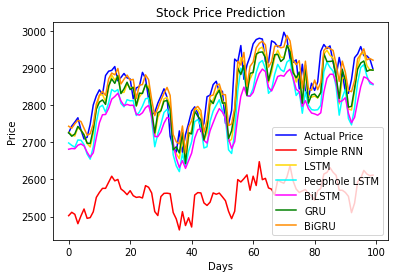

In [143]:
days = [i for i in range(0, 100)]
plt.plot(days, testY1[-100:], color='blue', label='Actual Price')
plt.plot(days, testPredict1[-100:], color='red', label='Simple RNN')
plt.plot(days, testPredict2[-100:], color='gold', label='LSTM')
plt.plot(days, testPredict3[-100:], color='cyan', label='Peephole LSTM')
plt.plot(days, testPredict4[-100:], color='magenta', label='BiLSTM')
plt.plot(days, testPredict5[-100:], color='green', label='GRU')
plt.plot(days, testPredict6[-100:], color='darkorange', label='BiGRU')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price Prediction")
plt.legend()
plt.show()